In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.io as pio
sns.set()





### Import data exploration and other modules

In [2]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
import data_exploration as de
from utils import *
import store_data_cleaning as sdc
import train_data_cleaning as tdc
from plots import *

### Read all the csv data

In [3]:
df_sample_submission = get_data_frame_from_dvc('data/rossmann-store-sales/sample_submission.csv')
df_store = get_data_frame_from_dvc('data/rossmann-store-sales/store.csv')
df_test = get_data_frame_from_dvc('data/rossmann-store-sales/test.csv')
df_train = get_data_frame_from_dvc('data/rossmann-store-sales/train.csv')



In [4]:
data_sample = de.DataExploration(df_sample_submission)
data_sample.get_data_frame()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [5]:
data_store = de.DataExploration(df_store)
data_store.get_data_frame()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [6]:
data_test = de.DataExploration(df_test)
data_test.get_data_frame()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [7]:
data_train = de.DataExploration(df_train)
data_train.get_data_frame()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


<h3 style="color:lightblue;"> 1. Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups? </h3>

In [41]:
# run store cleaning script

store = sdc.StoreDataCleaning(df_store)
cleaned_store_data_frame = store.get_cleaned_data_frame()


In [43]:
cleaned_store_data_frame.to_csv('../data/rossmann-store-sales/cleaned_store.csv')

In [9]:
de.DataExploration(cleaned_store_data_frame).get_data_frame()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,50,50.0,"Jan,Apr,Jul,Oct"
1,2,a,a,570.0,11.0,2007.0,1,13,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,50,50.0,"Jan,Apr,Jul,Oct"
4,5,a,a,29910.0,4.0,2015.0,0,50,50.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,50,50.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,9.0,2013.0,0,50,50.0,"Jan,Apr,Jul,Oct"
1113,1114,a,c,870.0,9.0,2013.0,0,50,50.0,"Jan,Apr,Jul,Oct"


In [10]:
# run train cleaning script

train = tdc.TrainDataCleaning(df_train)
cleaned_train_data_frame = train.get_cleaned_data_frame()

In [ ]:
cleaned_train_data_frame.to_csv('../data/rossmann-store-sales/cleaned_train.csv')

In [11]:
de.DataExploration(cleaned_train_data_frame).get_data_frame()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


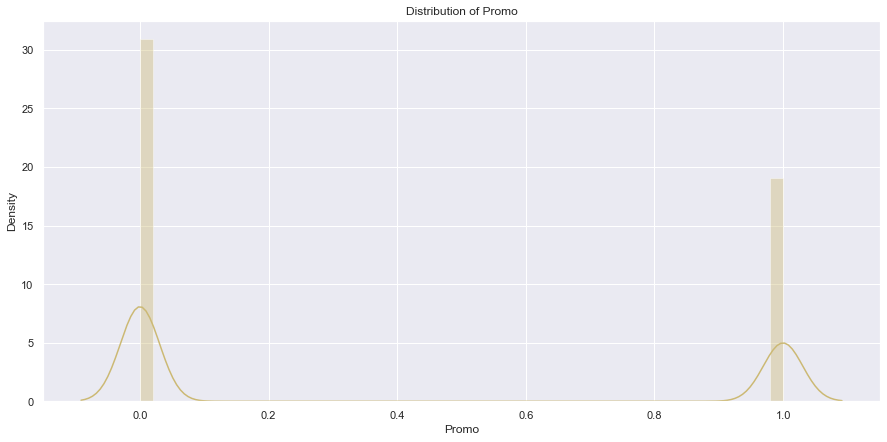

In [12]:
plot_dist(cleaned_train_data_frame['Promo'], 'Promo')


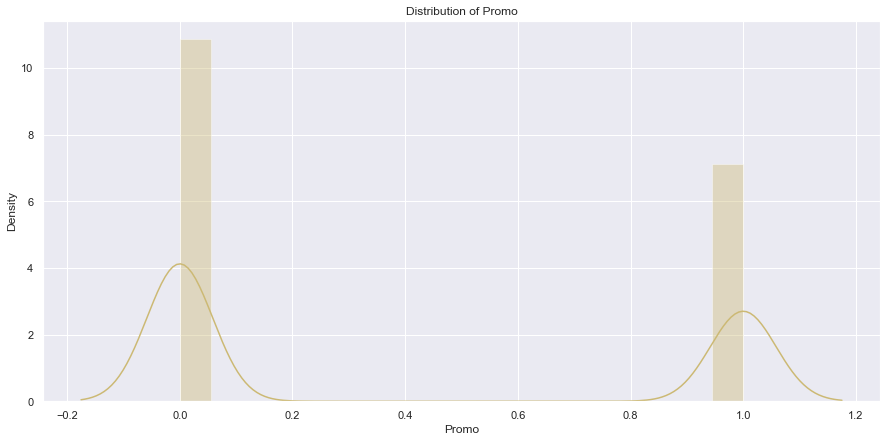

In [13]:
plot_dist(df_test['Promo'], 'Promo')


<h3 style='font-style:italic'> Observation: The distribution is similar for both train and test datasets</h3>

<h3 style="color:lightblue;">2. Check & compare sales behavior before, during and after holidays</h3>

In [14]:
# Merging the store and train dataframes to get all the features in a single dataframe

merged_df = pd.merge(cleaned_store_data_frame, cleaned_train_data_frame, on="Store")
merged_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,50,50.0,"Jan,Apr,Jul,Oct",5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,50,50.0,"Jan,Apr,Jul,Oct",4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,50,50.0,"Jan,Apr,Jul,Oct",3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,50,50.0,"Jan,Apr,Jul,Oct",2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,50,50.0,"Jan,Apr,Jul,Oct",1,2015-07-27,6102,612,1,1,0,1


#### School Holidays

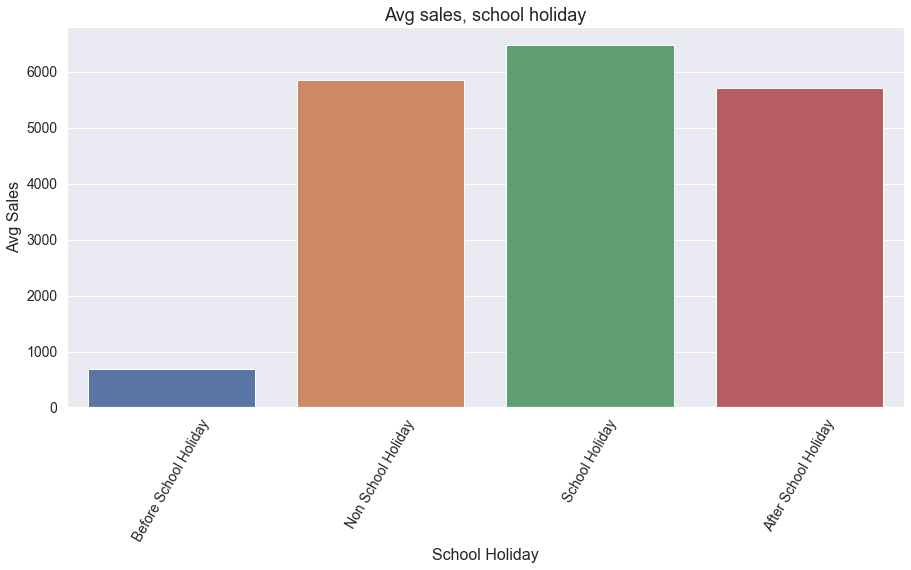

In [15]:
# Add indicator columns to indicate if the day is before or after school holiday
# -1 value is day after holiday and 1 value is holiday 2 is after school holiday

copy_merged = merged_df.copy()
copy_merged['BeforeSchoolHoliday'] = copy_merged['SchoolHoliday'].diff()
copy_merged['AfterSchoolHoliday'] = copy_merged['SchoolHoliday'].diff(periods=-1, )

copy_merged['BeforeSchoolHoliday'].fillna(0, inplace=True)
copy_merged['AfterSchoolHoliday'].fillna(0, inplace=True)

copy_merged['BeforeSchoolHoliday'] = copy_merged['BeforeSchoolHoliday'].astype(int)
copy_merged['AfterSchoolHoliday'] = copy_merged['AfterSchoolHoliday'].astype(int)

copy_merged.loc[copy_merged["BeforeSchoolHoliday"] == -1, "NewSchoolHoliday"] = -1
copy_merged.loc[copy_merged["AfterSchoolHoliday"] == -1, "NewSchoolHoliday"] = 2
copy_merged.loc[copy_merged["SchoolHoliday"] == 1 , "NewSchoolHoliday"] = 1

copy_merged['NewSchoolHoliday'].fillna(0, inplace=True)
copy_merged['NewSchoolHoliday'] = copy_merged['NewSchoolHoliday'].astype(int)


school_df_agg = copy_merged.groupby("NewSchoolHoliday").agg({"Sales": "mean"}).rename(index={-1: "Before School Holiday", 1: "School Holiday", 2: "After School Holiday", 0: "Non School Holiday"})
plot_bar(school_df_agg, school_df_agg.index, "Sales", "Avg sales, school holiday",
               "School Holiday", "Avg Sales")


# copy_merged.tail(30)

#### State Holidays: Public Holidays

In [16]:
# Add indicator columns to indicate if the day is before or after school holiday
# -1 value is day after holiday and 1 value is holiday 2 is after school holiday

copy_merged_new = merged_df.copy()
copy_merged_new['StateHoliday'].values

# copy_merged.tail(30)

['0', '0', '0', '0', '0', ..., '0', '0', '0', '0', 'a']
Length: 1017209
Categories (4, object): ['0', 'a', 'b', 'c']

In [17]:
idx = copy_merged_new[copy_merged_new['StateHoliday'] == 'a'].index
filtered_idx = (idx-1).union(idx-2).union(idx-3).union(idx-4).union(idx-5)
filtered_idx = filtered_idx[filtered_idx > 0]

filtered_idxx = (idx+1).union(idx+2).union(idx+3).union(idx+4).union(idx+5)
filtered_idxx = filtered_idxx[filtered_idxx < copy_merged_new.shape[0]]
copy_merged_new.loc[filtered_idx, 'NewStateHoliday'] = 2
copy_merged_new.loc[filtered_idxx, 'NewStateHoliday'] = -1
copy_merged_new.loc[idx, 'NewStateHoliday'] = 5


copy_merged_new['NewStateHoliday'].fillna(0, inplace=True)
copy_merged_new['NewStateHoliday'] = copy_merged_new['NewStateHoliday'].astype(int)



copy_merged_new.tail(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,NewStateHoliday
1017199,1115,d,c,5350.0,9.0,2013.0,1,22,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-10,5007,339,1,1,0,1,0
1017200,1115,d,c,5350.0,9.0,2013.0,1,22,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-09,4649,324,1,1,0,1,0
1017201,1115,d,c,5350.0,9.0,2013.0,1,22,2012.0,"Mar,Jun,Sept,Dec",2,2013-01-08,5243,341,1,1,0,1,0
1017202,1115,d,c,5350.0,9.0,2013.0,1,22,2012.0,"Mar,Jun,Sept,Dec",1,2013-01-07,6905,471,1,1,0,1,0
1017203,1115,d,c,5350.0,9.0,2013.0,1,22,2012.0,"Mar,Jun,Sept,Dec",7,2013-01-06,0,0,0,0,0,1,2
1017204,1115,d,c,5350.0,9.0,2013.0,1,22,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1,2
1017205,1115,d,c,5350.0,9.0,2013.0,1,22,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1,2
1017206,1115,d,c,5350.0,9.0,2013.0,1,22,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1,2
1017207,1115,d,c,5350.0,9.0,2013.0,1,22,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-02,3697,305,1,0,0,1,2
1017208,1115,d,c,5350.0,9.0,2013.0,1,22,2012.0,"Mar,Jun,Sept,Dec",2,2013-01-01,0,0,0,0,a,1,5


#### Before Holidays

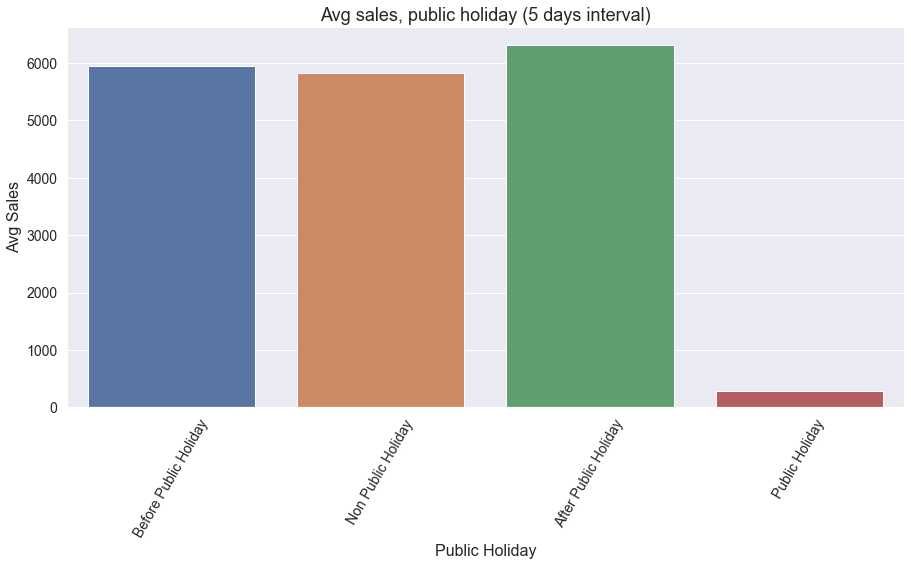

In [18]:
public = copy_merged_new.groupby("NewStateHoliday").agg({"Sales": "mean"}).rename(index={5: "Public Holiday", -1: "Before Public Holiday", 2: "After Public Holiday", 0: "Non Public Holiday"})
plot_bar(public, public.index, "Sales", "Avg sales, public holiday (5 days interval)",
               "Public Holiday", "Avg Sales")

<h3 style='font-style:italic'> Observation: </h3>
<h3 style='font-style:italic'> -> Sales in five days after public holidays is relatively higher that that of the days before holidays and other days</h3>
<h3 style='font-style:italic'> -> Sales on public holidays usually nose dive</h3>

#### State Holidays: Easter Holiday

In [19]:
copy_merged_easter = copy_merged.copy()
idx_easter = copy_merged_easter[copy_merged_easter['StateHoliday'] == 'b'].index
filtered_idx_easter = (idx_easter-1).union(idx_easter-2).union(idx_easter-3).union(idx_easter-4).union(idx_easter-5)
filtered_idx_easter = filtered_idx_easter[filtered_idx_easter > 0]

filtered_idxx_easter = (idx_easter+1).union(idx_easter+2).union(idx_easter+3).union(idx_easter+4).union(idx_easter+5)
filtered_idxx_easter = filtered_idxx_easter[filtered_idxx_easter < copy_merged_easter.shape[0]]
copy_merged_easter.loc[filtered_idx_easter, 'NewEasterHoliday'] = 2
copy_merged_easter.loc[filtered_idxx_easter, 'NewEasterHoliday'] = -1
copy_merged_easter.loc[idx_easter, 'NewEasterHoliday'] = 5


copy_merged_easter['NewEasterHoliday'].fillna(0, inplace=True)
copy_merged_easter['NewEasterHoliday'] = copy_merged_easter['NewEasterHoliday'].astype(int)


copy_merged_easter

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,BeforeSchoolHoliday,AfterSchoolHoliday,NewSchoolHoliday,NewEasterHoliday
0,1,c,a,1270.0,9.0,2008.0,0,50,50.0,"Jan,Apr,Jul,Oct",...,5263,555,1,1,0,1,0,0,1,0
1,1,c,a,1270.0,9.0,2008.0,0,50,50.0,"Jan,Apr,Jul,Oct",...,5020,546,1,1,0,1,0,0,1,0
2,1,c,a,1270.0,9.0,2008.0,0,50,50.0,"Jan,Apr,Jul,Oct",...,4782,523,1,1,0,1,0,0,1,0
3,1,c,a,1270.0,9.0,2008.0,0,50,50.0,"Jan,Apr,Jul,Oct",...,5011,560,1,1,0,1,0,0,1,0
4,1,c,a,1270.0,9.0,2008.0,0,50,50.0,"Jan,Apr,Jul,Oct",...,6102,612,1,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,9.0,2013.0,1,22,2012.0,"Mar,Jun,Sept,Dec",...,4771,339,1,0,0,1,0,0,1,0
1017205,1115,d,c,5350.0,9.0,2013.0,1,22,2012.0,"Mar,Jun,Sept,Dec",...,4540,326,1,0,0,1,0,0,1,0
1017206,1115,d,c,5350.0,9.0,2013.0,1,22,2012.0,"Mar,Jun,Sept,Dec",...,4297,300,1,0,0,1,0,0,1,0
1017207,1115,d,c,5350.0,9.0,2013.0,1,22,2012.0,"Mar,Jun,Sept,Dec",...,3697,305,1,0,0,1,0,0,1,0


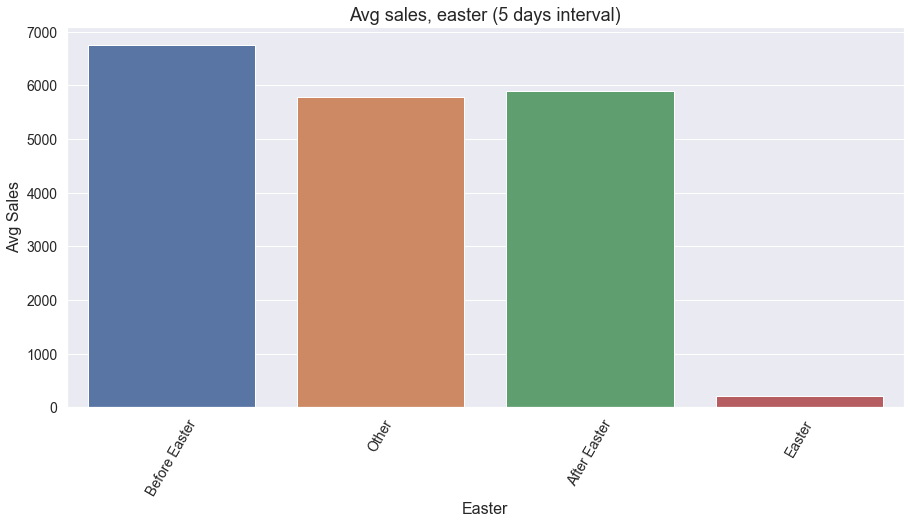

In [20]:
easter = copy_merged_easter.groupby("NewEasterHoliday").agg({"Sales": "mean"}).rename(index={5: "Easter", -1: "Before Easter", 2: "After Easter", 0: "Other"})
plot_bar(easter, easter.index, "Sales", "Avg sales, easter (5 days interval)",
               "Easter", "Avg Sales")

<h3 style='font-style:italic'> Observation: </h3>
<h3 style='font-style:italic'> -> Sales in five days before easter is relatively higher that that of the days after easter and other days</h3>
<h3 style='font-style:italic'> -> Sales on easter is very small </h3>

#### State Holidays: Christmas 

In [21]:
copy_merged_christmas = copy_merged.copy()
idx_christmas = copy_merged_christmas[copy_merged_christmas['StateHoliday'] == 'c'].index
filtered_idx_christmas = (idx_christmas-1).union(idx_christmas-2).union(idx_christmas-3).union(idx_christmas-4).union(idx_christmas-5)
filtered_idx_christmas = filtered_idx_christmas[filtered_idx_christmas > 0]

filtered_idxx_christmas = (idx_christmas+1).union(idx_christmas+2).union(idx_christmas+3).union(idx_christmas+4).union(idx_christmas+5)
filtered_idxx_christmas = filtered_idxx_christmas[filtered_idxx_christmas < copy_merged_christmas.shape[0]]
copy_merged_christmas.loc[filtered_idx_christmas, 'NewChristmasHoliday'] = 2
copy_merged_christmas.loc[filtered_idxx_christmas, 'NewChristmasHoliday'] = -1
copy_merged_christmas.loc[idx_christmas, 'NewChristmasHoliday'] = 5


copy_merged_christmas['NewChristmasHoliday'].fillna(0, inplace=True)
copy_merged_christmas['NewChristmasHoliday'] = copy_merged_christmas['NewChristmasHoliday'].astype(int)


copy_merged_christmas

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,BeforeSchoolHoliday,AfterSchoolHoliday,NewSchoolHoliday,NewChristmasHoliday
0,1,c,a,1270.0,9.0,2008.0,0,50,50.0,"Jan,Apr,Jul,Oct",...,5263,555,1,1,0,1,0,0,1,0
1,1,c,a,1270.0,9.0,2008.0,0,50,50.0,"Jan,Apr,Jul,Oct",...,5020,546,1,1,0,1,0,0,1,0
2,1,c,a,1270.0,9.0,2008.0,0,50,50.0,"Jan,Apr,Jul,Oct",...,4782,523,1,1,0,1,0,0,1,0
3,1,c,a,1270.0,9.0,2008.0,0,50,50.0,"Jan,Apr,Jul,Oct",...,5011,560,1,1,0,1,0,0,1,0
4,1,c,a,1270.0,9.0,2008.0,0,50,50.0,"Jan,Apr,Jul,Oct",...,6102,612,1,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,9.0,2013.0,1,22,2012.0,"Mar,Jun,Sept,Dec",...,4771,339,1,0,0,1,0,0,1,0
1017205,1115,d,c,5350.0,9.0,2013.0,1,22,2012.0,"Mar,Jun,Sept,Dec",...,4540,326,1,0,0,1,0,0,1,0
1017206,1115,d,c,5350.0,9.0,2013.0,1,22,2012.0,"Mar,Jun,Sept,Dec",...,4297,300,1,0,0,1,0,0,1,0
1017207,1115,d,c,5350.0,9.0,2013.0,1,22,2012.0,"Mar,Jun,Sept,Dec",...,3697,305,1,0,0,1,0,0,1,0


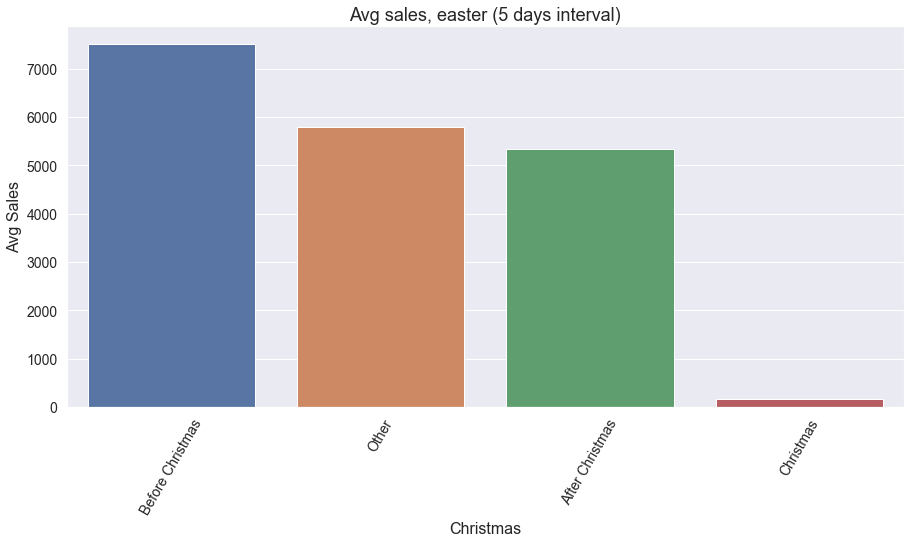

In [22]:
christmas = copy_merged_christmas.groupby("NewChristmasHoliday").agg({"Sales": "mean"}).rename(index={5: "Christmas", -1: "Before Christmas", 2: "After Christmas", 0: "Other"})
plot_bar(christmas, christmas.index, "Sales", "Avg sales, easter (5 days interval)",
               "Christmas", "Avg Sales")


<h3 style='font-style:italic'> Observation: </h3>
<h3 style='font-style:italic'> -> Sales in five days before Christmas is relatively higher that that of the days after Christmas and other days</h3>
<h3 style='font-style:italic'> -> Sales on Christmas is very small</h3>

<h3 style="color:lightblue;">3. Find out any seasonal (Christmas, Easter etc) purchase behaviours,</h3>

#### Seasonal Behaviour: Christmas

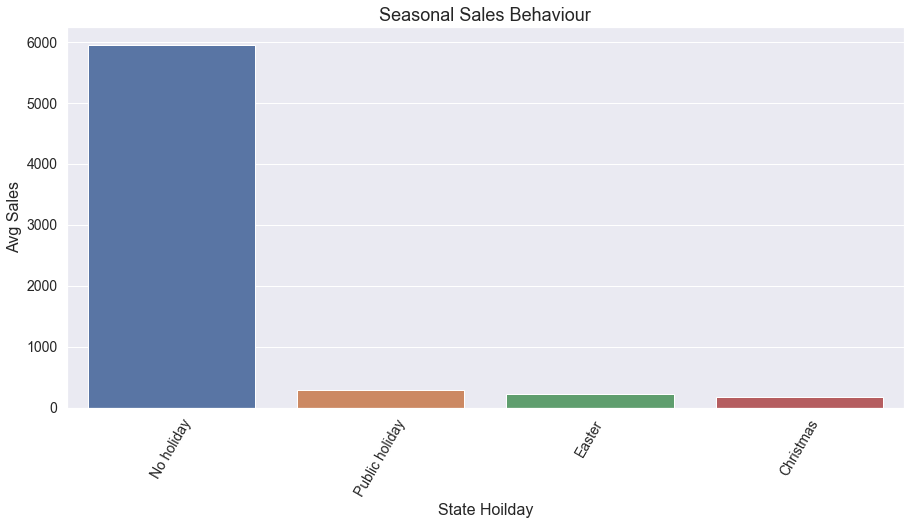

In [23]:
seasonal_behaviour_check = cleaned_train_data_frame.groupby("StateHoliday").agg({"Sales": "mean"})
seasonal_behaviour_check = seasonal_behaviour_check.rename(index={"0": "No holiday", "a": "Public holiday",
                                                                    "b": "Easter", "c": "Christmas"})

plot_bar(seasonal_behaviour_check, seasonal_behaviour_check.index, "Sales", "Seasonal Sales Behaviour",
               "State Hoilday", "Avg Sales")



<h3 style='font-style:italic'> Observation: </h3>
<h3 style='font-style:italic'> -> Sales in public holidays is usually very small and there is a pattern similarity among the sales in those days (closer to eachother)</h3>
<h3 style='font-style:italic'> -> Sales on days other than holidays are as high as average sales of around 6000. This is around 20 folds.</h3>
<h3 style='font-style:italic'> -> Hence, the company expects a very low sales on these public holidays.</h3>

<h3 style="color:lightblue;">4. What can you say about the correlation between sales and number of customers?</h3>

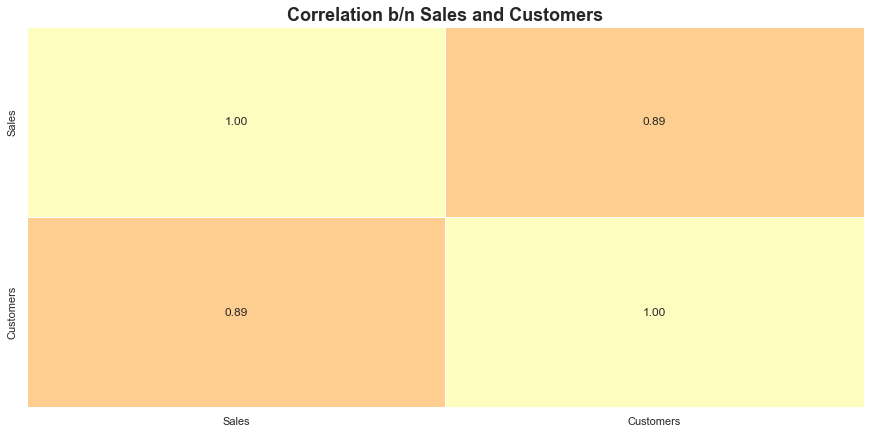

In [24]:
# sns.heatmap(merged_df[['Sales','Customers']].corr())
plot_heatmap(merged_df[['Sales','Customers']].corr(), 'Correlation b/n Sales and Customers', cbar=False) 

<h3 style='font-style:italic'> Observation: Sales and number of customers are highly correlated. This means increasing sales has to be highly associated with increasing number of customers. According to the data, it is not the amount of money a customer matters, rather a larger number of customers buying what they need to buy.</h3>
<h3 style='font-style:italic'> This can be the behaviour of pharmacy market. Not usually does customers buy medicines and other products from pharmacy far morethan they need (Unlike cloth market).</h3>



<h3 style="color:lightblue;">5. How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?</h3>

In [25]:
def split_date(df):
        df['Date'] = pd.to_datetime(df['Date'])
        df['Year'] = pd.DatetimeIndex(df['Date']).year
        df['Month'] = pd.DatetimeIndex(df['Date']).month
        df['Day'] = pd.DatetimeIndex(df['Date']).day
        return df

In [26]:
date_split_data_frame =  split_date(merged_df)

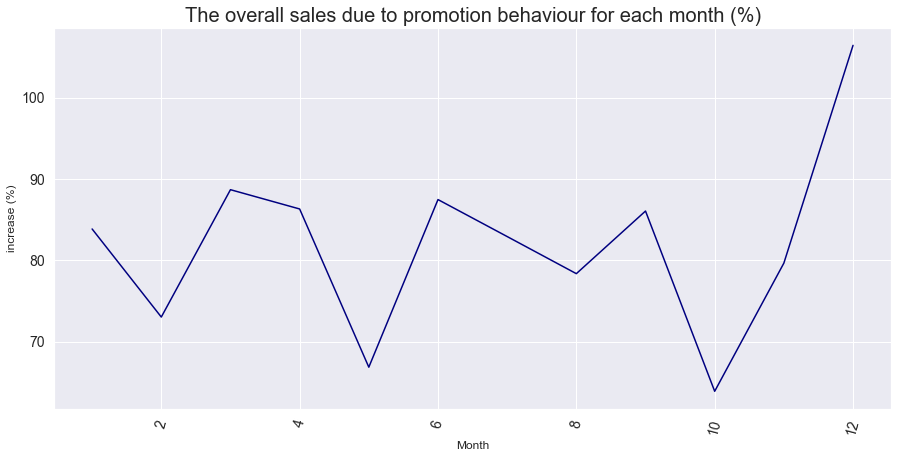

In [27]:


promo_sales = date_split_data_frame[date_split_data_frame['Promo'] == 1]
non_promo_sales = date_split_data_frame[date_split_data_frame['Promo'] == 0]

promotion_sales_agg = promo_sales.groupby("Month").agg({"Sales":  "mean"})
promotion_sales_agg = promotion_sales_agg.rename(columns={"Sales": "Avg Promotion Sales"})

non_promotion_sales_agg = non_promo_sales.groupby("Month").agg({"Sales":  "mean"})
non_promotion_sales_agg = non_promotion_sales_agg.rename(columns={"Sales": "Avg Non-Promotion Sales"})


merged_promotion_sales_df = pd.merge(promotion_sales_agg, non_promotion_sales_agg, on="Month")

sales_increase_diff = merged_promotion_sales_df["Avg Promotion Sales"] - merged_promotion_sales_df["Avg Non-Promotion Sales"]

merged_promotion_sales_df["increase (%)"] = (sales_increase_diff/merged_promotion_sales_df["Avg Non-Promotion Sales"]) * 100
merged_promotion_sales_df

plot_line(merged_promotion_sales_df, merged_promotion_sales_df.index,
               "increase (%)", "The overall sales due to promotion behaviour for each month (%)", 'navy'
               )


<h3 style='font-style:italic'> Observation: Promotion has higher impact in the increase of sales when we observe the effect in months. Except May and October, promotion yielded increase of sales by morethan 70% in relation to that of the sales without promotion. </h3>




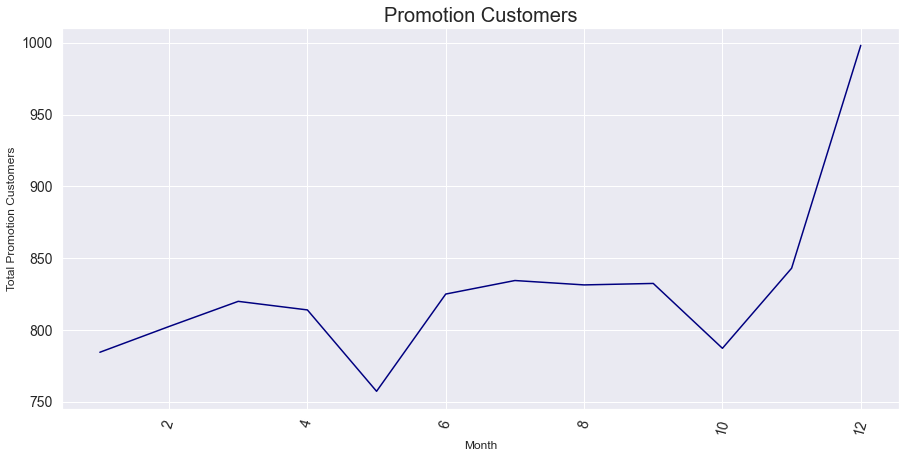

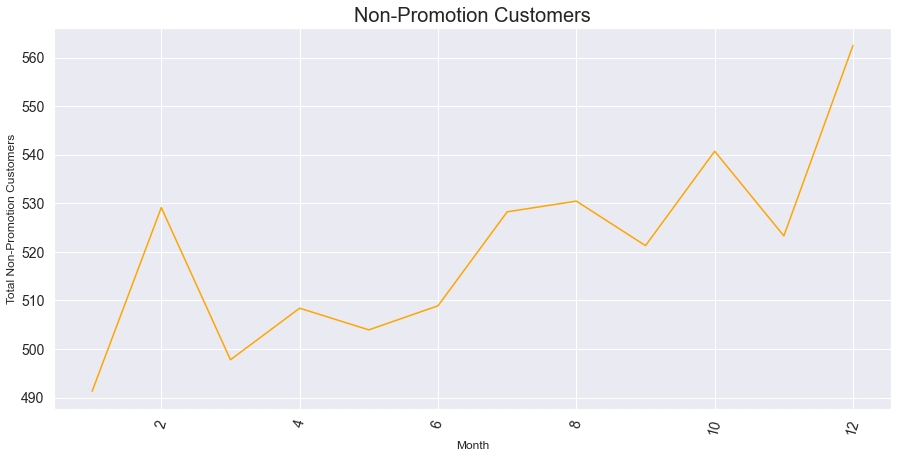

<Figure size 1584x504 with 0 Axes>

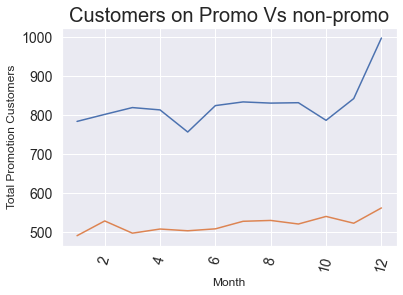

In [28]:

promo_sales_customers = date_split_data_frame[date_split_data_frame['Promo'] == 1]
non_promo_sales_customers = date_split_data_frame[date_split_data_frame['Promo'] == 0]

promotion_sales_agg_customers = promo_sales_customers.groupby("Month").agg({"Customers":  "mean"})
promotion_sales_agg_customers = promotion_sales_agg_customers.rename(columns={"Customers": "Total Promotion Customers"})

non_promotion_sales_agg_customers = non_promo_sales_customers.groupby("Month").agg({"Customers":  "mean"})
non_promotion_sales_agg_customers = non_promotion_sales_agg_customers.rename(columns={"Customers": "Total Non-Promotion Customers"})


merged_promotion_sales_df_customers = pd.merge(promotion_sales_agg_customers, non_promotion_sales_agg_customers, on="Month")

# sales_increase_diff = merged_promotion_sales_df_customers["Avg Promotion Sales"] - merged_promotion_sales_df_customers["Avg Non-Promotion Sales"]

# merged_promotion_sales_df_customers["increase (%)"] = (sales_increase_diff/merged_promotion_sales_df_customers["Avg Non-Promotion Sales"]) * 100
# merged_promotion_sales_df_customers

plot_line(merged_promotion_sales_df_customers, merged_promotion_sales_df_customers.index,
               "Total Promotion Customers", "Promotion Customers", 'navy'
               )
plot_line(merged_promotion_sales_df_customers, merged_promotion_sales_df_customers.index,
               "Total Non-Promotion Customers", "Non-Promotion Customers", 'orange'
               )

plot_multi_line(merged_promotion_sales_df_customers, merged_promotion_sales_df_customers.index,
               "Total Promotion Customers", "Total Non-Promotion Customers", "Customers on Promo Vs non-promo"
               )



<h3 style='font-style:italic'> Observation: On the graph above the effect of promotion on attracting customers and on existing customers are: 
1. On attracting new customers, promos were able to increase the customers considerably. </br>

2.On existing customers, promos have effect on retaining customers except for May and October. 
</h3>

<h3 style="color:lightblue;">6. Could the promos be deployed in more effective ways? Which stores should promos be deployed in?</h3>

<Figure size 1080x504 with 0 Axes>

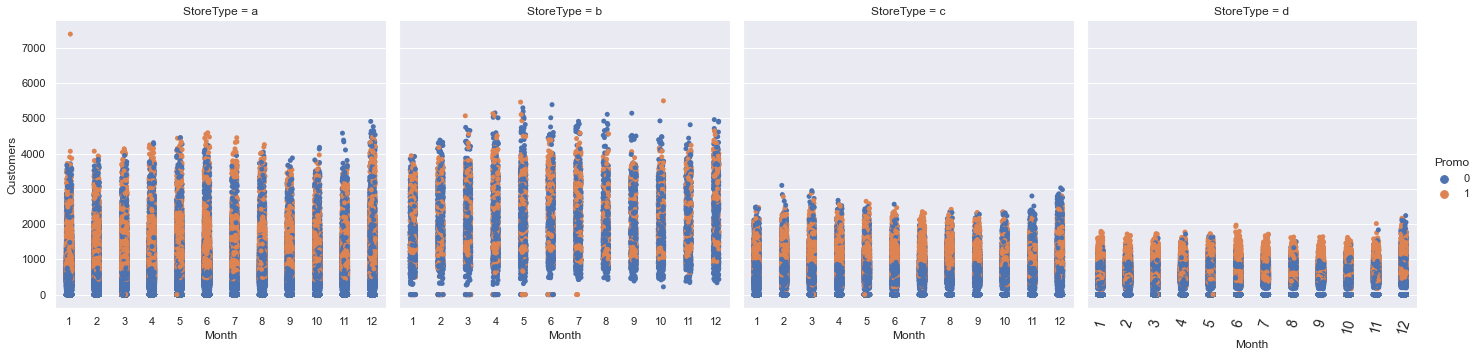

In [29]:
plot_cat(merged_df, 'Month', 'Customers', 'Promo', 'StoreType')

<h3 style='font-style:italic'> Observation: Promos could be deployed in more effective ways. As we can see in the plot the effect of promos on increasing customers is relatively higher but does not have greater effect on it. Relatively, store type "b" is positively affected by the promos and store typr "d" is less affected by it. Therefore, promos could be deployed effectively and more effectively in store type "c" and "d". 
</h3>

<h3 style="color:lightblue;">7. Trends of customer behavior during store open and closing times</h3>

Stores that are open in all week days
Number of stores that open in all week days is 927


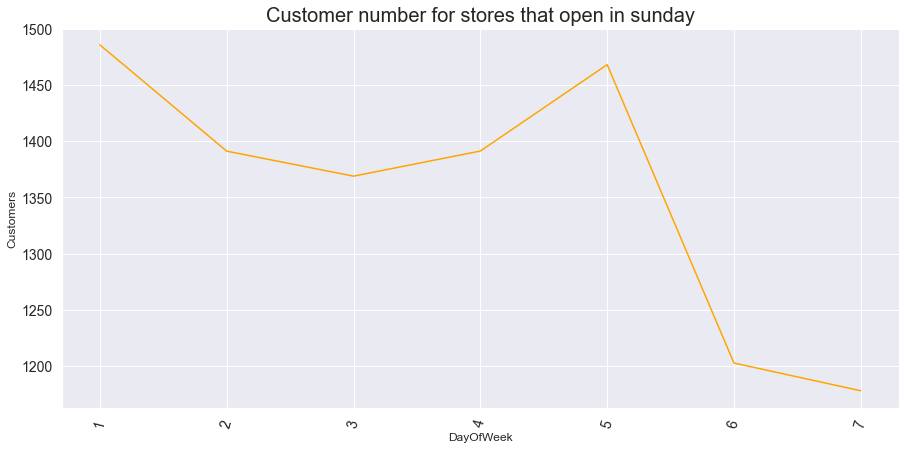

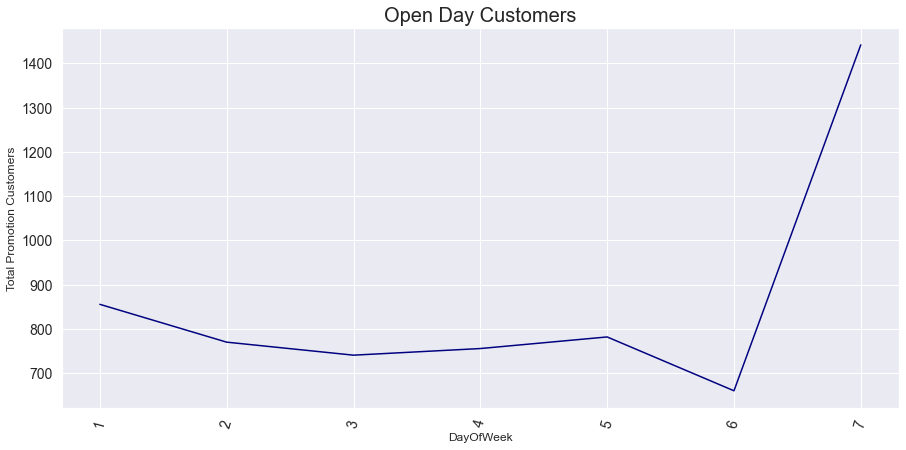

<Figure size 1584x504 with 0 Axes>

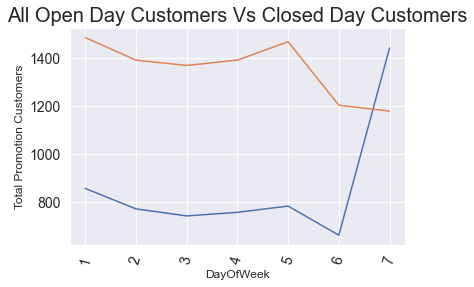

In [30]:

non_holiday_sales = cleaned_train_data_frame[cleaned_train_data_frame['StateHoliday'] == '0']
week_sales = non_holiday_sales[non_holiday_sales["DayOfWeek"] < 6]

not_open_all_week_days_sales = week_sales[week_sales["Open"] == 0]["Store"].to_list()

week_day_stores = cleaned_store_data_frame[~cleaned_store_data_frame["Store"].isin(not_open_all_week_days_sales)]
non_week_day_stores = cleaned_store_data_frame[cleaned_store_data_frame["Store"].isin(not_open_all_week_days_sales)]

print("Stores that are open in all week days")

print(f"Number of stores that open in all week days is {week_day_stores.shape[0]}")


sunday_open = non_holiday_sales[(non_holiday_sales["DayOfWeek"] == 7) & (non_holiday_sales["Open"] == 1)]["Store"].unique()
sunday_sales_df = merged_df[merged_df["Store"].isin(sunday_open)]
sunday_open_customers = sunday_sales_df.groupby("DayOfWeek").agg({"Customers": "mean"})



open_df = date_split_data_frame[date_split_data_frame['Open'] == 1] 



open_df_customers = open_df.groupby("DayOfWeek").agg({"Customers":  "mean"})
open_df_customers = open_df_customers.rename(columns={"Customers": "Total Promotion Customers"})

merged_df_days = pd.DataFrame()

merged_df_days['Total Promotion Customers'] = open_df_customers['Total Promotion Customers']
merged_df_days['Total Sunday Open'] = sunday_open_customers['Customers']

merged_df_days
plot_line(sunday_open_customers, sunday_open_customers.index,
               "Customers", "Customer number for stores that open in sunday", 'orange'
               )
plot_line(open_df_customers, open_df_customers.index,
               "Total Promotion Customers", "Open Day Customers", 'navy'
               )

plot_multi_line(merged_df_days, merged_df_days.index,
               "Total Promotion Customers", "Total Sunday Open", "All Open Day Customers Vs Closed Day Customers"
               )


<h3 style='font-style:italic'> Observation:.
</h3>

<h3 style="color:lightblue;">8. Which stores are opened on all weekdays? How does that affect their sales on weekends? </h3>

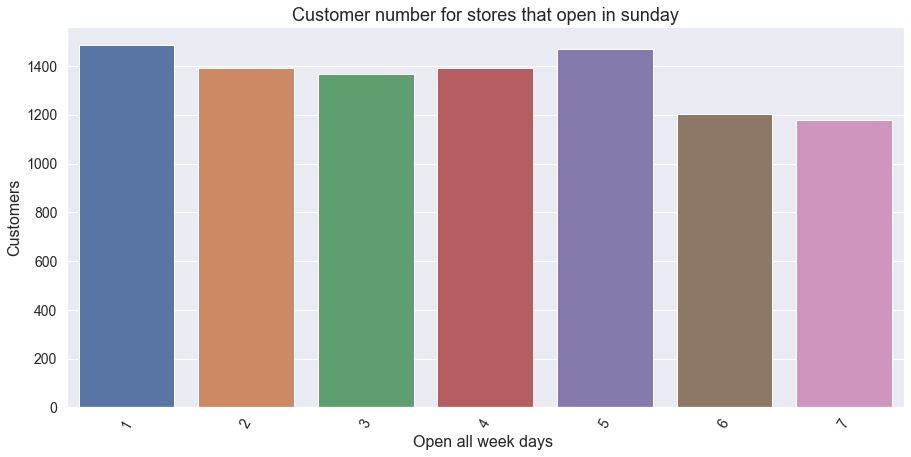

In [31]:
sunday_open = non_holiday_sales[(non_holiday_sales["DayOfWeek"] == 7) & (non_holiday_sales["Open"] == 1)]["Store"].unique()
sunday_sales_df = merged_df[merged_df["Store"].isin(sunday_open)]
sunday_open_customers = sunday_sales_df.groupby("DayOfWeek").agg({"Customers": "mean"})

plot_bar(sunday_open_customers, sunday_open_customers.index,
               "Customers", "Customer number for stores that open in sunday",
               "Open all week days ", "Customers")

<h3 style='font-style:italic'> Observation: The number of customer that came to these stores on sunday are almost equal to that of saturday and is not that much lower compared to other week days. So opening in sundays is recommended.</h3>


<h3 style="color:lightblue;">9. Check how the assortment type affects sales</h3>

In [32]:
# fig = go.Figure()

a_assortment_df = merged_df[merged_df.Assortment == 'a']
b_assortment_df = merged_df[merged_df.Assortment == 'b']
c_assortment_df = merged_df[merged_df.Assortment == 'c']

a_sales_agg = a_assortment_df.groupby("Month").agg({"Sales":  "mean"})
a_sales_agg = a_sales_agg.rename(columns={"Sales": "A-type assortment sales"})

b_sales_agg = b_assortment_df.groupby("Month").agg({"Sales":  "mean"})
b_sales_agg = b_sales_agg.rename(columns={"Sales": "B-type assortment sales"})

c_sales_agg = c_assortment_df.groupby("Month").agg({"Sales":  "mean"})
c_sales_agg = c_sales_agg.rename(columns={"Sales": "C-type assortment sales"})

assortment_sales = pd.merge(a_sales_agg, b_sales_agg, on="Month")
assortment_sales = pd.merge(assortment_sales, c_sales_agg, on="Month")


assortment_sales



,A-type assortment sales,B-type assortment sales,C-type assortment sales
Month,,,
1,5244.218557,7426.112306,5686.660861
2,5396.380089,8104.128307,5889.798663
3,5499.371503,8224.057348,6071.465153
4,5477.054244,8577.082716,5991.714815
5,5210.639323,9131.075269,5748.264667
6,5466.127693,8999.653086,6044.960386
7,5731.631242,8852.003722,6391.777452
8,5324.694316,7949.796964,6063.191033
9,5294.767818,8254.686275,5829.499342


<h3 style='font-style:italic'> Observation: The average sales on B-type assortment is high while the B-type being the lowest</h3>


<h3 style="color:lightblue;">10. How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?</h3>

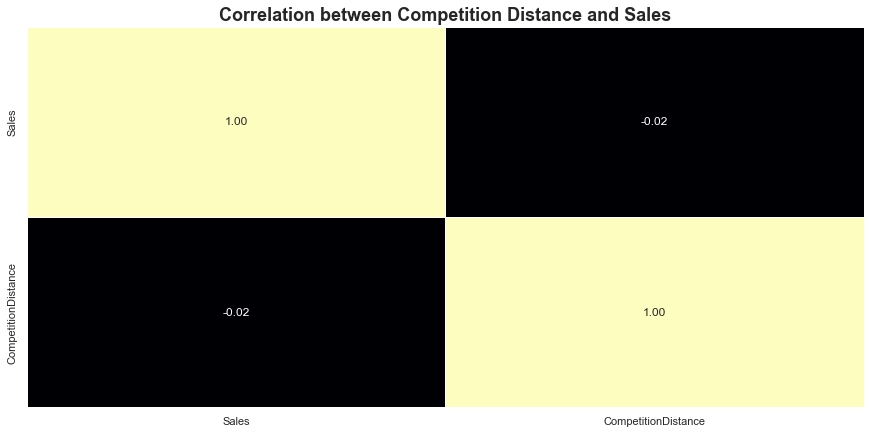

In [33]:
distance_competition = merged_df[["Store", "Sales", "Customers", "StoreType", "CompetitionDistance"]]
distance_competition_agg = distance_competition.groupby("Store").agg({"Sales": "sum", "Customers" : "sum",
                                                      "CompetitionDistance": lambda x: max(x)})


distance_competition_corr = distance_competition[["Sales", "CompetitionDistance"]].corr()

plot_heatmap(distance_competition_corr, "Correlation between Competition Distance and Sales")

<h3 style='font-style:italic'> Observation: There is a small correlation between Competition Distance and Sales. Hence the sales is not that much affected by the number of competitors nearby</h3>


<h3 style="color:lightblue;">11. How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance</h3>

In [39]:
competition_df = merged_df[merged_df['CompetitionOpenSinceMonth'].notnull()]
competition_df.head()
competition_df["CompetitionOpenSinceYear"] = competition_df["CompetitionOpenSinceYear"].astype("int").astype("str")
competition_df["CompetitionOpenSinceMonth"] = competition_df["CompetitionOpenSinceMonth"].astype("int").astype("str")

competition_df["CompetitionOpenSinceDate"] = competition_df["CompetitionOpenSinceYear"] + "-" + competition_df["CompetitionOpenSinceMonth"] + "-" + "01" 
competition_df["CompetitionOpenSinceDate"] =  pd.to_datetime(competition_df["CompetitionOpenSinceDate"])

competition_df = competition_df[["Date", "Sales", "Store", "CompetitionOpenSinceDate"]]


competition_df["BeforeCompetitionOpen"] = competition_df["Date"] < competition_df["CompetitionOpenSinceDate"]

competition_sales_df = competition_df.groupby("BeforeCompetitionOpen").agg({"Sales": "mean"})
competition_sales_df

,Sales
BeforeCompetitionOpen,
False,5785.355783
True,5716.602573


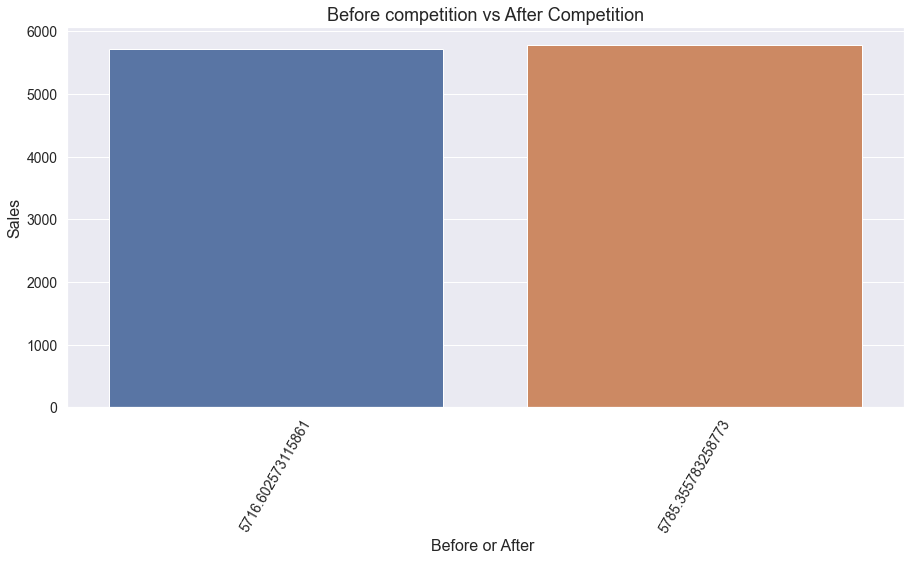

In [40]:
plot_bar(competition_sales_df, "Sales",
               "Sales", "Before competition vs After Competition",
               "Before or After ", "Sales")

<h3 style='font-style:italic'> Observation: Sales decreased after competition is opened. But the value is not that big. This means the pharmacy has mostly loyal customers due to many reasons.</h3>
